# Unsupervised Learning: Trade&Ahead

**Marks: 60**

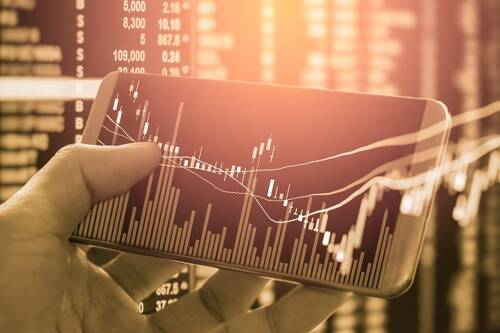
<b><h1><center>Project 7: Trade&Ahead</center></h1></b>

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

%load_ext nb_black

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# import data
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [3]:
# check first rows on df data
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

In [4]:
# checking numbers of rows and columns
print(f"There are", data.shape[0], "rows and", data.shape[1], "columns")

There are 340 rows and 15 columns


<IPython.core.display.Javascript object>

In [5]:
# checking some extra rows again
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

In [6]:
# check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

In [7]:
# copy df
df = data.copy()

<IPython.core.display.Javascript object>

In [8]:
# checking for duplicates
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
# checking for nan values
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
# check the statiscal info
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


<IPython.core.display.Javascript object>

- There are no strange observations in the statistical information, only that high maximum values have been found.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

## Information:
- Above we did some checks already concerning duplicated and missing values. However the data shows this is not needed.
- Below we have created visuals to answer the EDA question for good understanding of the data.

In [11]:
# checking the columns
df.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

<IPython.core.display.Javascript object>

In [12]:
# creating a variable with numerical values
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]

numdf = df.select_dtypes(include=numerics)

<IPython.core.display.Javascript object>

In [13]:
# checking numerical columns
num_col = numdf.columns
num_col

Index(['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

<IPython.core.display.Javascript object>

In [14]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=numdf, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=numdf, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        numdf[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        numdf[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

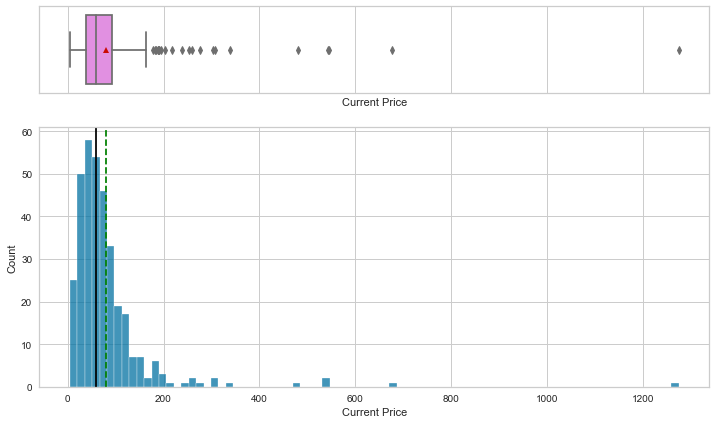

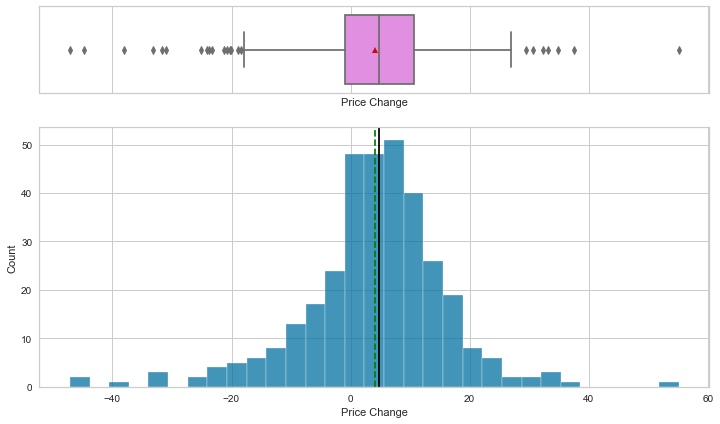

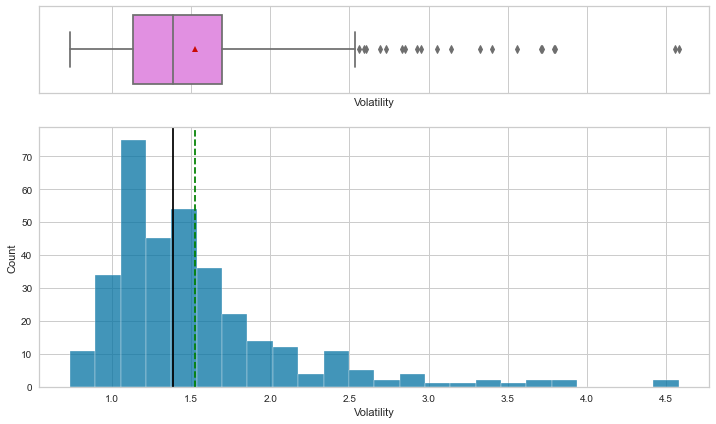

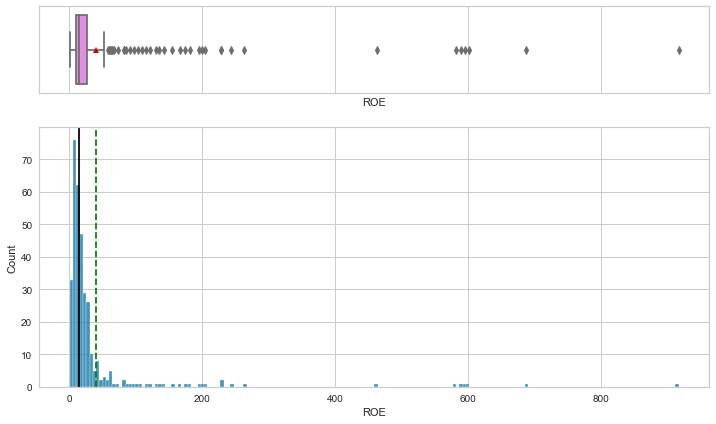

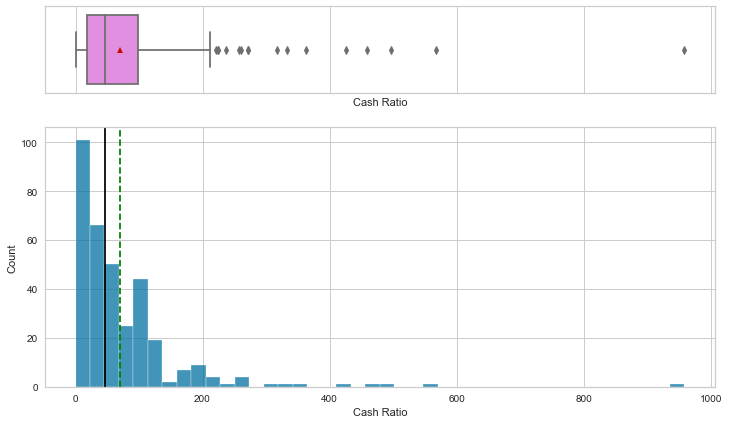

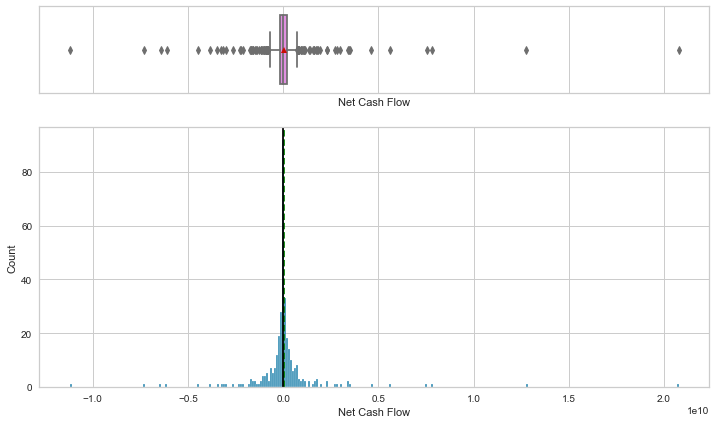

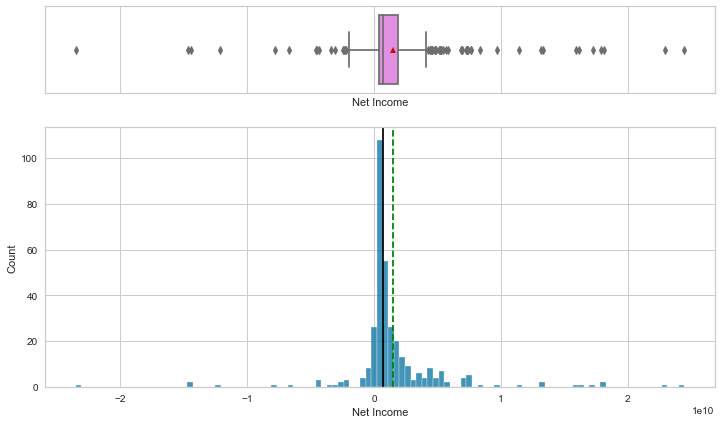

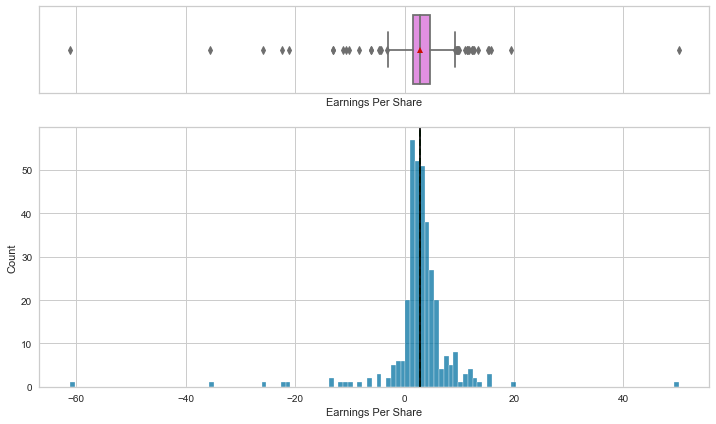

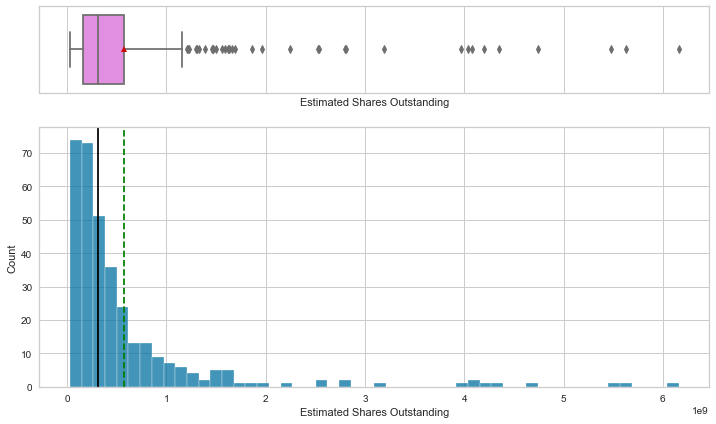

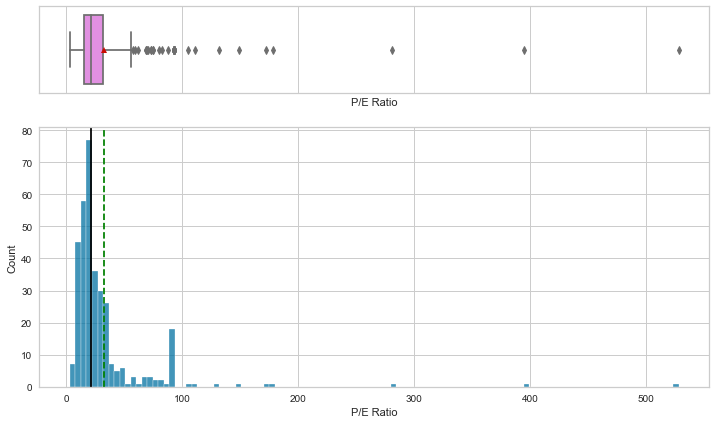

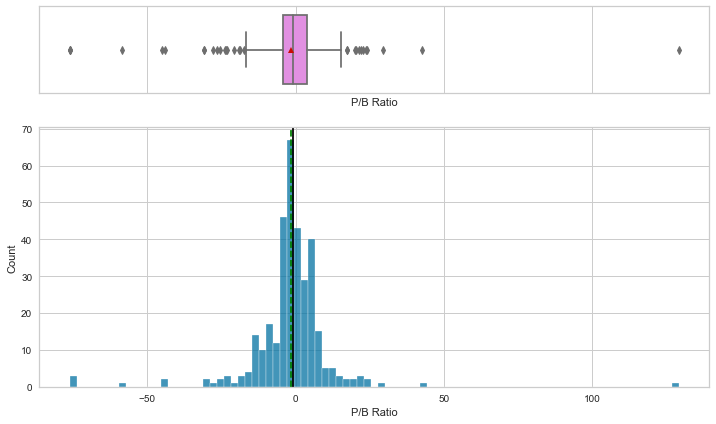

<IPython.core.display.Javascript object>

In [15]:
# creating histograms and boxplots for all numerical columns
for feature in numdf.columns:
    histogram_boxplot(numdf, feature, figsize=(12, 7), kde=False, bins=None)

- The distrubtion is either close to normal or right skewed, with some outliers.
- Mostly we find the mean right of the median.

In [16]:
# function to create labeled barplots
def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

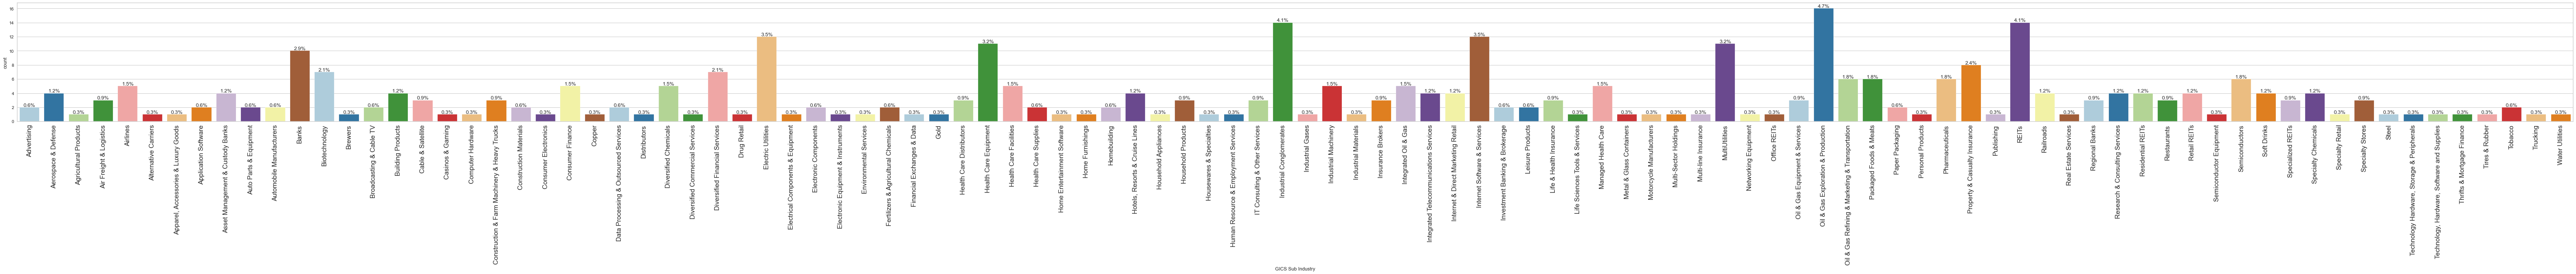

<IPython.core.display.Javascript object>

In [17]:
# barplot GICS Sub Industry
labeled_barplot(df, "GICS Sub Industry", perc=True)

- Hard to determine any insights. We should stay with the Economic Sector only, as there are less variations.

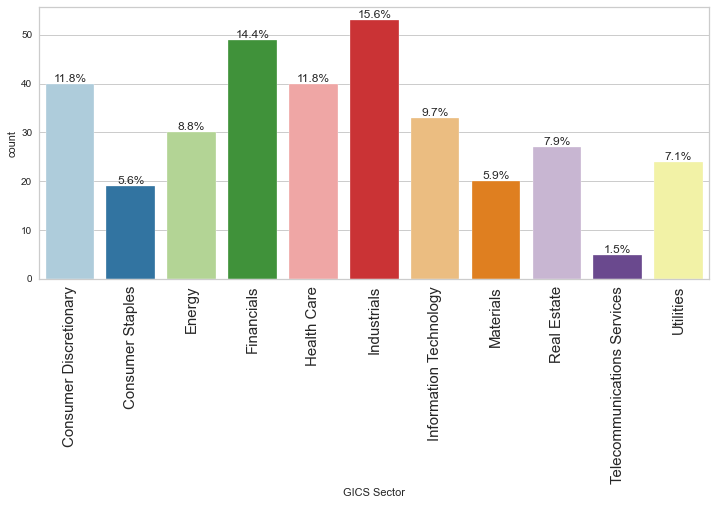

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(df, "GICS Sector", perc=True)

- The most counts are in Industrial, followed by Financials and a shared third place for Consumer Discretionary and Health Care

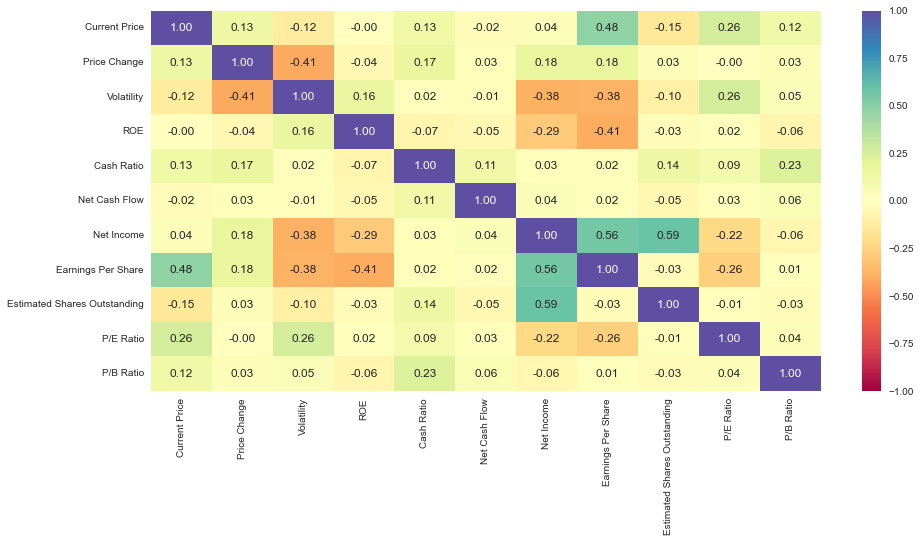

<IPython.core.display.Javascript object>

In [19]:
# create heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Positive correlated:
    - Net Income on Earnings Per Share and Estimated Shares Outstanding.
    - Current Price on Earnings Per Share
- Negative correlated:
    - Price Change on Volatility
    - Volatility on Net Income and Earnings Per Share
    - ROE on Earnings Per Share
- There are more correlation, however these are a less strong related.

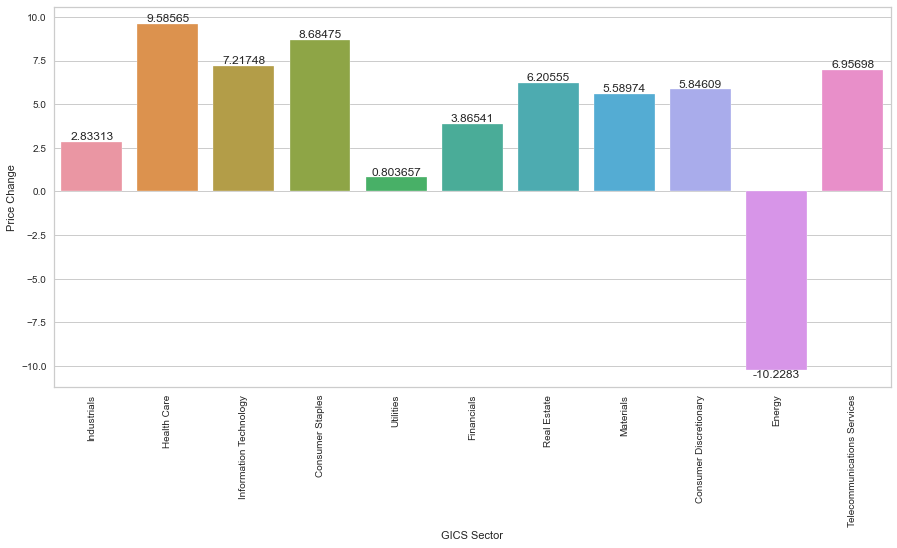

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df, x="GICS Sector", y="Price Change", ci=False)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

- Health Care is the sector that has the highest increase, followed by Consumer Staples and Information Technology
- Energy has a major decrease.

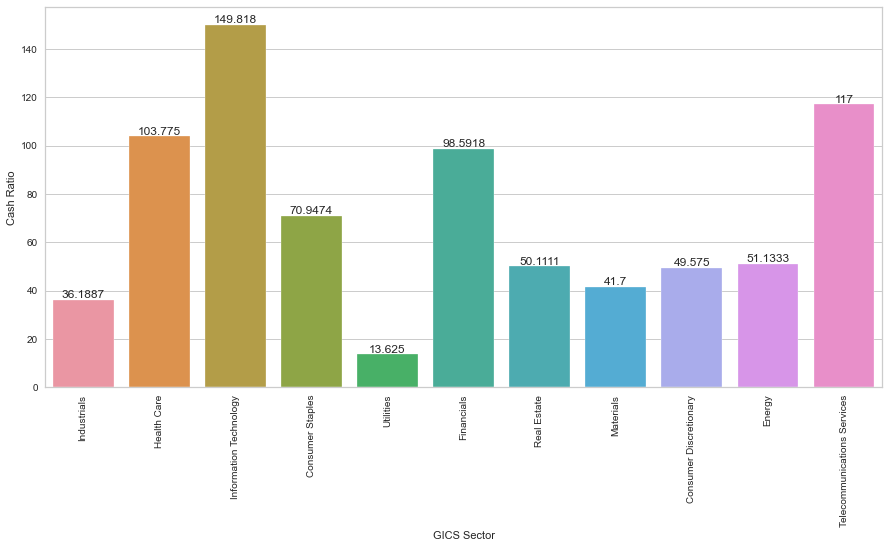

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df, x="GICS Sector", y="Cash Ratio", ci=False)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

- The Cash Ratio's is the highest in Information Technology, followed by Telecommunications Services and Health Care with more than 100. Financials are close as well, however the Cash Ratio is below 100.


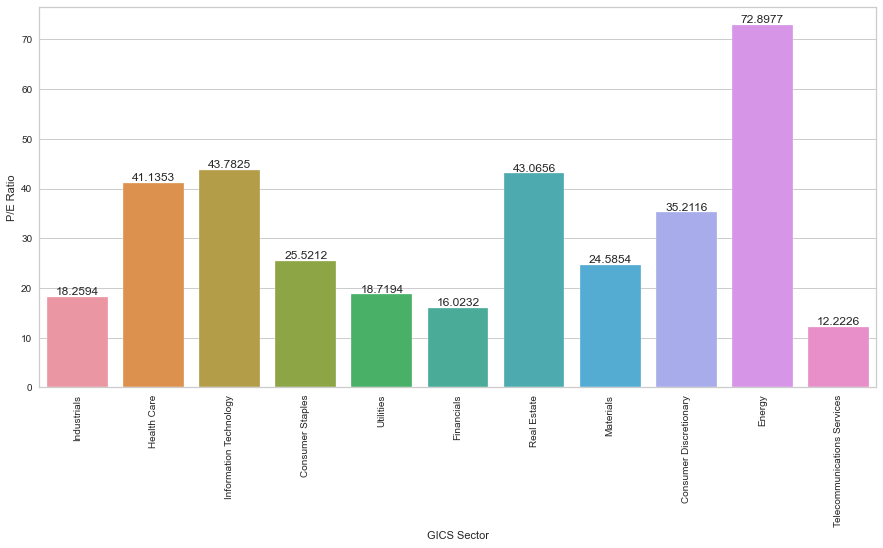

<IPython.core.display.Javascript object>

In [22]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df, x="GICS Sector", y="P/E Ratio", ci=False)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

- By far the highest P/E Ratio is in the Engergy sector, followed by three sectors around 40. These three sectors are Information Technology, Real Estate and Health Care. 

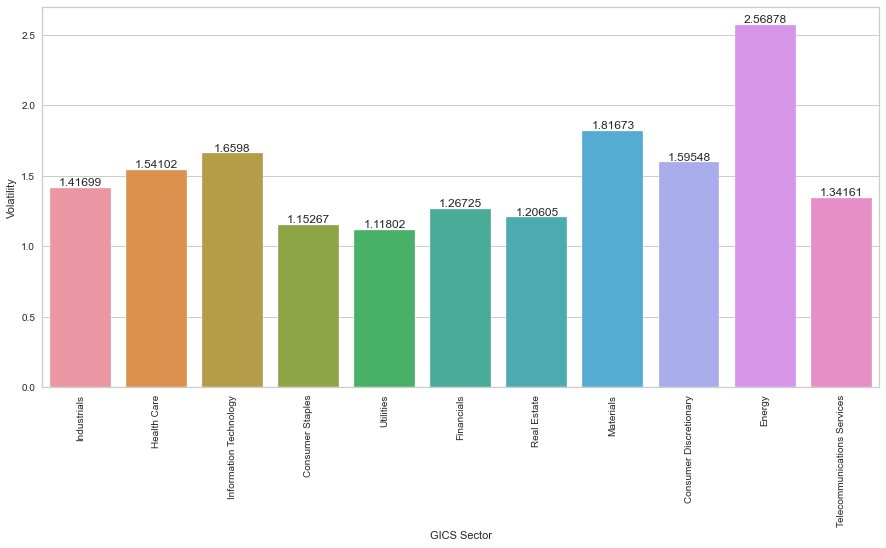

<IPython.core.display.Javascript object>

In [23]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df, x="GICS Sector", y="Volatility", ci=False)
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

- The greatest SD is on Energy, followed by Materials. Information Technology, Consumer Discretionary and Health Care follows.

**Questions**:

1. What does the distribution of stock prices look like?
- Right skewed with outliers on the right and the mean is higher than the median.
2. The stocks of which economic sector have seen the maximum price increase on average?
- Health Care is the sector that has the highest increase, followed by Consumer Staples and Information Technology
3. How are the different variables correlated with each other?
- Positive correlated:
    - Net Income on Earnings Per Share and Estimated Shares Outstanding.
    - Current Price on Earnings Per Share
- Negative correlated:
    - Price Change on Volatility
    - Volatility on Net Income and Earnings Per Share
    - ROE on Earnings Per Share
- There are more correlation, however these are a less strong related.
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
- The Cash Ratio's is the highest in Information Technology, followed by Telecommunications Services and Health Care with more than 100. Financials are close as well, however the Cash Ratio is below 100.
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?
- By far the highest P/E Ratio is in the Engergy sector, followed by three sectors around 40. These three sectors are Information Technology, Real Estate and Health Care. 

## Outliers Check

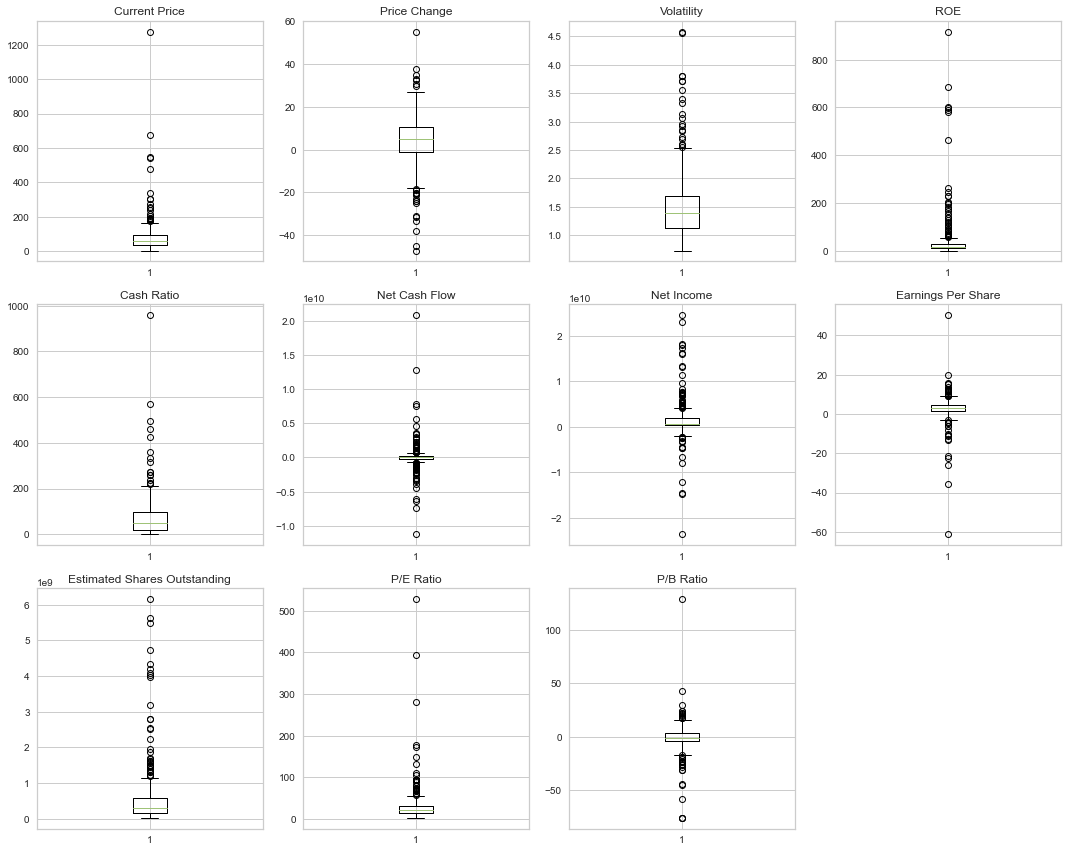

<IPython.core.display.Javascript object>

In [24]:
# Check for outliers
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- We see outliers in all boxplots. However we will not treath these, as they are proper values.


### Scaling

In [25]:
# scale the data, so we can work with the values
scaler = StandardScaler()
subset = numdf.copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [26]:
# creating the df with the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## K-means Clustering

In [27]:
# creating a df especially for K-means
#%%time
k_means_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


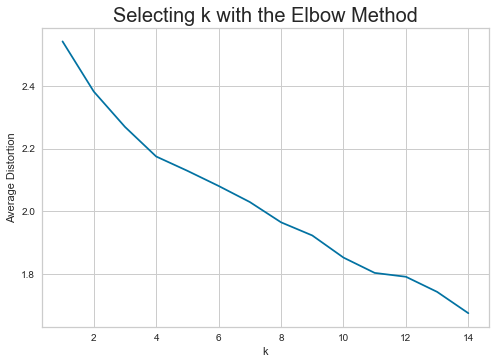

<IPython.core.display.Javascript object>

In [28]:
# searching for the number of clusters
#%%time
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

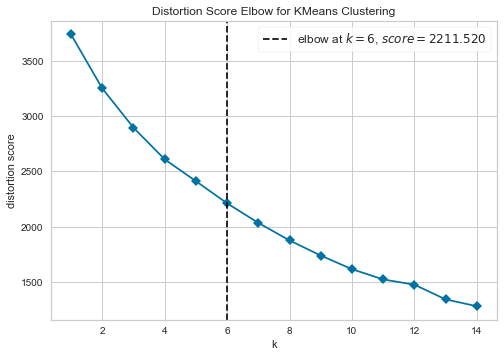

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [29]:
# checking for the right number of cluster
#%%time
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=False)  # , timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

* There is a knick at 4 and also 6 looks like a good clustering. Let's take 4 to 7 as clusters, based on the elbow.

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


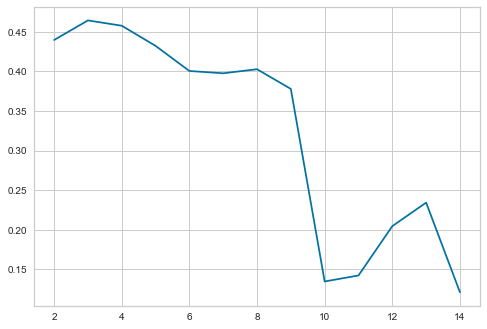

<IPython.core.display.Javascript object>

In [30]:
# Searching for the right numbers of clusters with the Silhouette score
#%%time
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

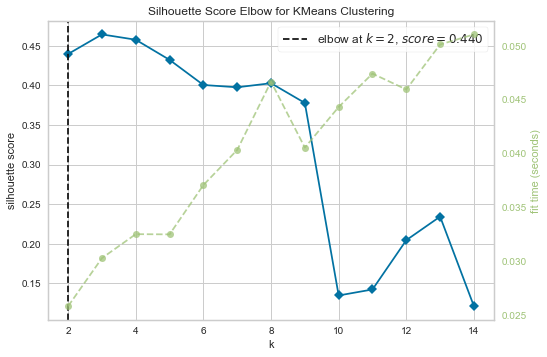

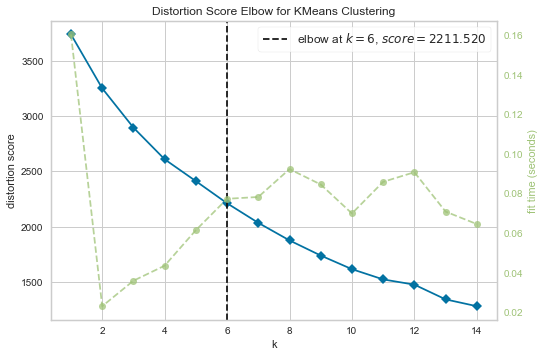

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [31]:
#%%time
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

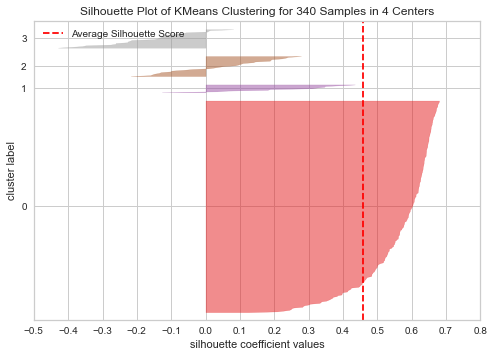

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [32]:
# finding optimal no. of clusters with silhouette coefficients
#%%time

visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

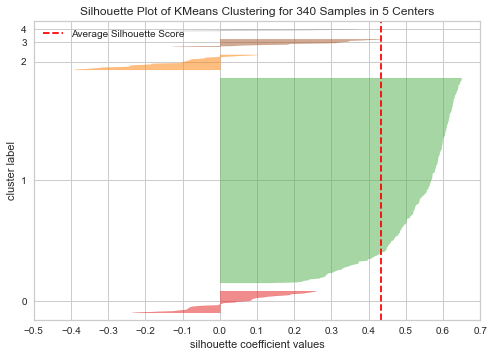

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [33]:
# finding optimal no. of clusters with silhouette coefficients
#%%time
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

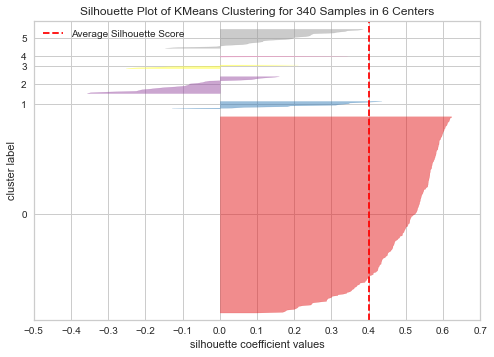

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [34]:
# finding optimal no. of clusters with silhouette coefficients
#%%time

visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

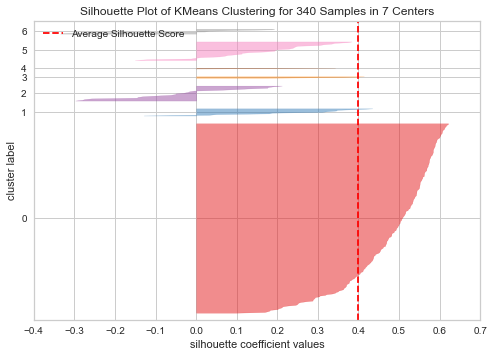

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [35]:
# finding optimal no. of clusters with silhouette coefficients
#%%time

visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model K-means Clustering

**Let's take 4 as the appropriate no. of clusters as the silhouette score is high as well and there is knick at 4 in the elbow curve.**

In [36]:
%%time
# final K-means model
kmeans = KMeans(
    n_clusters=4, random_state=1
)  
kmeans.fit(k_means_df)

CPU times: total: 359 ms
Wall time: 40.9 ms


KMeans(n_clusters=4, random_state=1)

<IPython.core.display.Javascript object>

In [37]:
%%time
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

CPU times: total: 0 ns
Wall time: 496 µs


<IPython.core.display.Javascript object>

### Cluster Profiling

In [38]:
%%time
km_cluster_profile = df1.groupby(
    "KM_segments"
).mean()

CPU times: total: 0 ns
Wall time: 1.7 ms


<IPython.core.display.Javascript object>

In [39]:
%%time
# let's see the names of the shares in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following shares are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following shares are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle I

<IPython.core.display.Javascript object>

In [40]:
%%time
# add count in each segment
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Current Price"].count().values
)

CPU times: total: 0 ns
Wall time: 1.94 ms


<IPython.core.display.Javascript object>

In [41]:
%%time
# let's display cluster profiles and highlight max and min values
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0).highlight_min(
    color="red", axis=0
)

CPU times: total: 46.9 ms
Wall time: 59.8 ms


,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


<IPython.core.display.Javascript object>

CPU times: total: 469 ms
Wall time: 476 ms


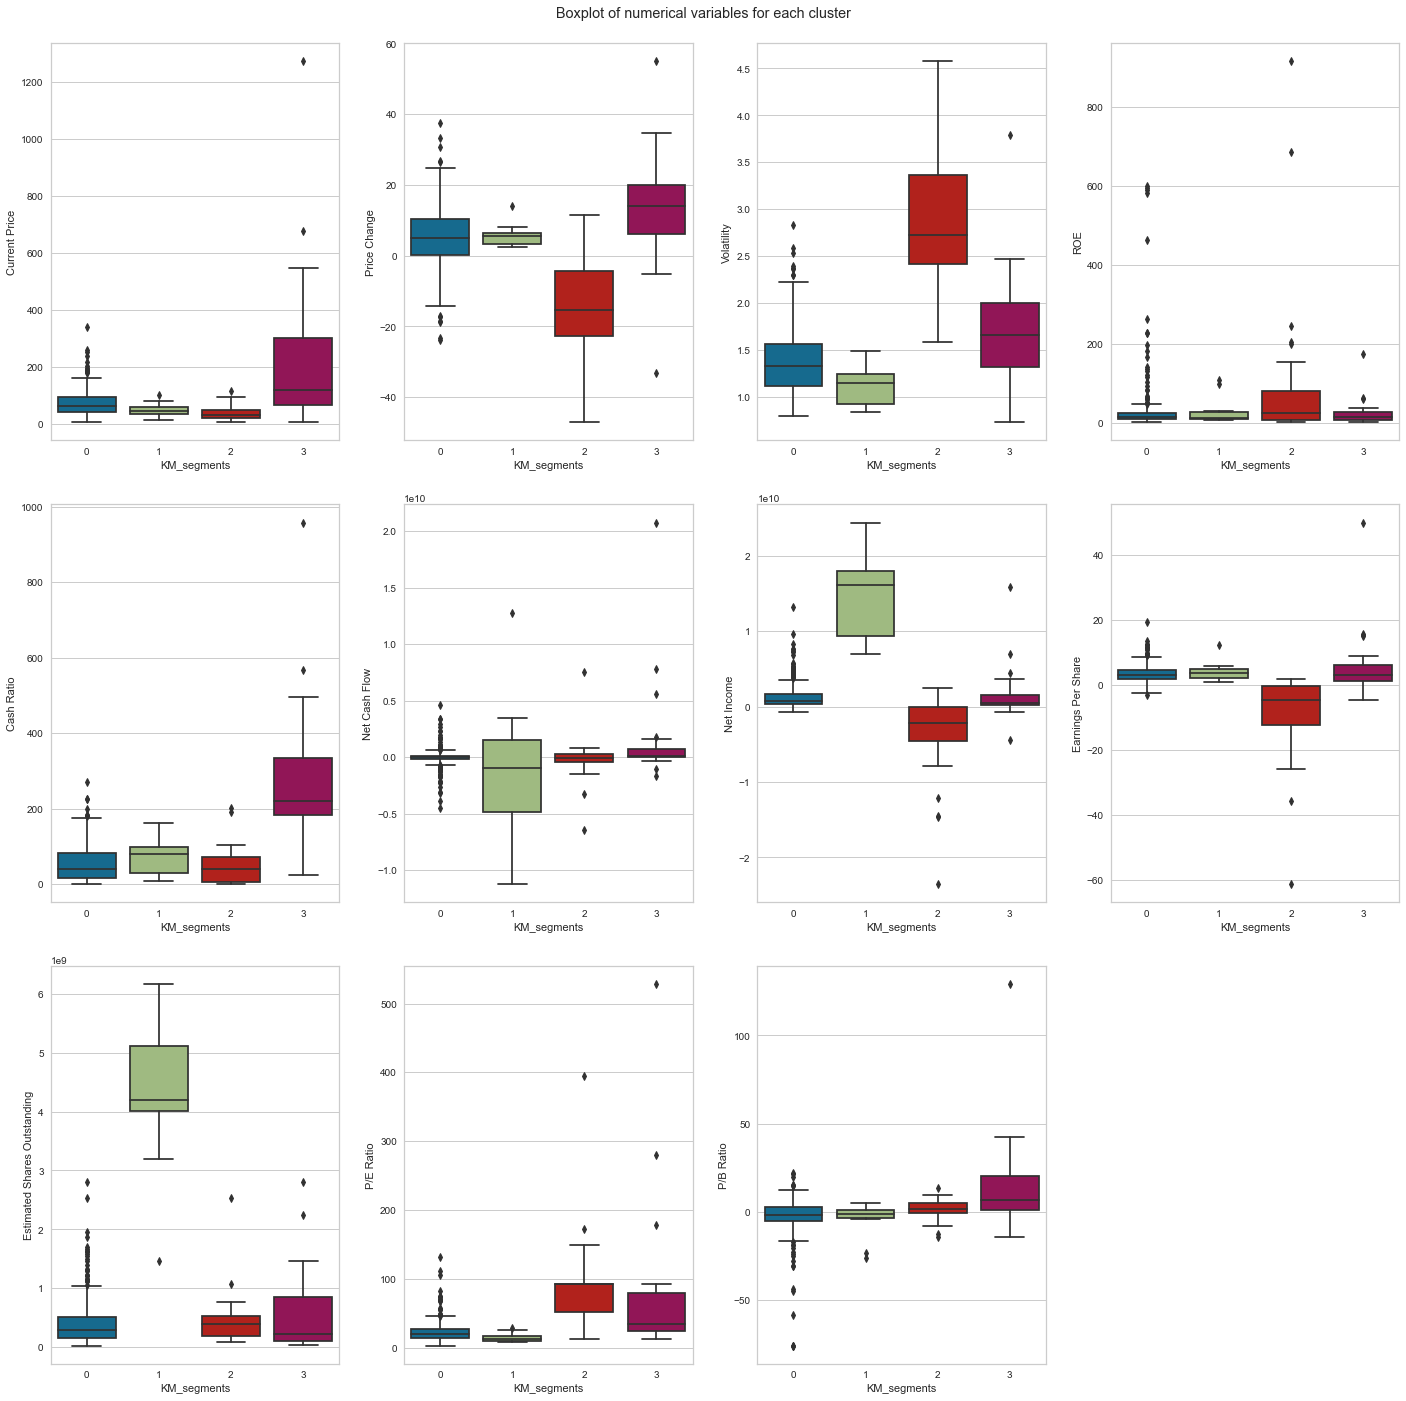

<IPython.core.display.Javascript object>

In [42]:
%%time
# creating boxplot for visualizing the data
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

CPU times: total: 62.5 ms
Wall time: 61.9 ms


<AxesSubplot:xlabel='KM_segments'>

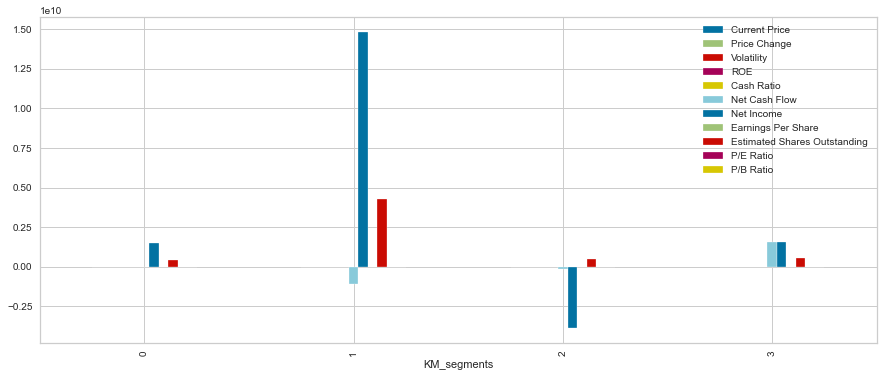

<IPython.core.display.Javascript object>

In [43]:
%%time
df1.groupby("KM_segments").mean().plot.bar(figsize=(15, 6))

In [44]:
%%time
df1.groupby(["KM_segments", "GICS Sector"])["Security"].count()

CPU times: total: 0 ns
Wall time: 2 ms


KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          6
             Financials                     45
             Health Care                    29
             Industrials                    52
             Information Technology         24
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Energy                         22
             Industrials                     1
             Inform

<IPython.core.display.Javascript object>

### Insights

- **Cluster 0**:
    - There are 277 shares in this cluster, which is the **highest** amongst the clusters.
    - The Estimated Shares Outstanding are the **lowest** amongst the clusters.
    - *Other indicators* are **moderate**.
 

- **Cluster 1**:
    - There are 11 shares in this cluster, which is the **lowest** amongst the clusters.
    - Net Income are the **highest** amongst the clusters.
    - Estimated Shares Outstanding are the **highest** amongst the clusters.
    - Volatility are the **lowest** amongst the clusters.
    - Net Cash Flow	are the **lowest** amongst the clusters.
    - P/E Ratio	are the **lowest** amongst the clusters.
    - P/B Ratio	are the **lowest** amongst the clusters.
    - *Other indicators* are **moderate**.
    
   
- **Cluster 2**:
    - There are 27 shares in this cluster, which is **moderate** amongst the clusters.
    - Volatility is the **highest** amongst the clusters.
    - ROE is the **highest** amongst the clusters.
    - P/E Ratio	are the **highest** amongst the clusters.
    - Current Price	are the **lowest** amongst the clusters.
    - Price Change are the **lowest** amongst the clusters.
    - Cash Ratio are the **lowest** amongst the clusters.
    - Net Income are the **lowest** amongst the clusters.
    - Earnings Per Share are the **lowest** amongst the clusters.	
    - *Other indicators* are **moderate**.
    
    
- **Cluster 3**:
    - There are 25 shares in this cluster, which is **moderate** amongst the clusters.
    - Current Price	are the **highest** amongst the clusters.
    - Price Change are the **highest** amongst the clusters.
    - Cash Ratio are the **highest** amongst the clusters.
    - Net Cash Flow are the **highest** amongst the clusters.	
    - Earnings Per Share are the **highest** amongst the clusters.	
    - P/B Ratio	are the **highest** amongst the clusters.
    - ROE are the **lowest** amongst the clusters.	
    - *Other indicators* are **moderate**.

## Hierarchical Clustering

In [45]:
# creating df for Hierarchical Clustering
hc_df = subset_scaled_df.copy()

<IPython.core.display.Javascript object>

In [46]:
# checking Cophenetic correlation on different metrics and methods
#%%time

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.792530720285.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correlation

<IPython.core.display.Javascript object>

In [47]:
# check euclidean with different linkage methods
#%%time
# list of distance metrics
distance_metrics = ["euclidean"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [48]:
# check all methods on metric euclidean
#%%time
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [49]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Checking Dendrograms

**Let's see the dendrograms for the different linkage methods.**

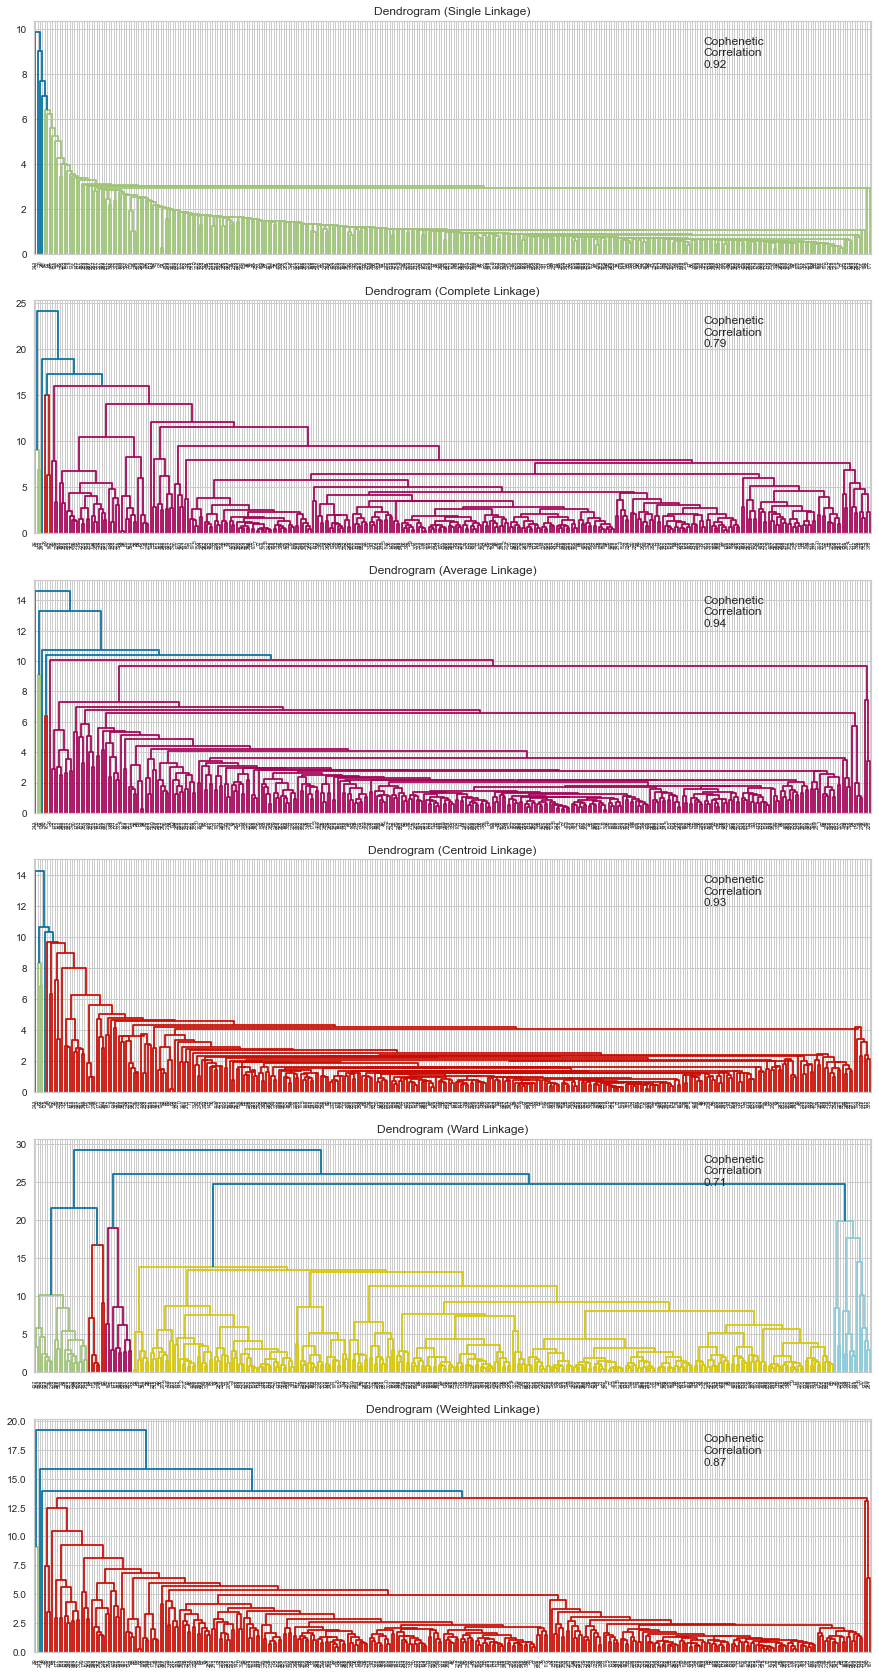

<IPython.core.display.Javascript object>

In [50]:
#%%time

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [51]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


<IPython.core.display.Javascript object>

- We have chosen for Ward since there are nicely distributed clusters when we choose 4 as n_clusters 

### Creating Final Model Hierachical Clustering

In [52]:
%%time
HCmodel = AgglomerativeClustering(
    n_clusters=4, affinity="euclidean", linkage="ward"
)  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

CPU times: total: 0 ns
Wall time: 4.01 ms


AgglomerativeClustering(n_clusters=4)

<IPython.core.display.Javascript object>

In [53]:
%%time
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

CPU times: total: 0 ns
Wall time: 2.03 ms


<IPython.core.display.Javascript object>

### Cluster Profiling

In [54]:
%%time
# create mean values grouped by segments
hc_cluster_profile = df2.groupby(
    "HC_segments"
).mean()  ## Complete the code to groupby the cluster labels

CPU times: total: 0 ns
Wall time: 1.99 ms


<IPython.core.display.Javascript object>

In [55]:
%%time

# create column with counts per segment
hc_cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

CPU times: total: 0 ns
Wall time: 2.05 ms


<IPython.core.display.Javascript object>

In [56]:
%%time
# let's display cluster profiles and highlight max and min values
hc_cluster_profile.style.highlight_min(color="red", axis=0).highlight_max(
    color="lightgreen", axis=0
)

CPU times: total: 0 ns
Wall time: 1.03 ms


,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_segments,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285


<IPython.core.display.Javascript object>

In [57]:
%%time
# let's see the names of the shares in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following shares are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following shares are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limite

<IPython.core.display.Javascript object>

In [58]:
%%time
df2.groupby(["HC_segments", "GICS Sector"])["Security"].count()

CPU times: total: 0 ns
Wall time: 997 µs


HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     1
             Information Technology          1
             Materials                       1
1            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consum

<IPython.core.display.Javascript object>

CPU times: total: 625 ms
Wall time: 621 ms


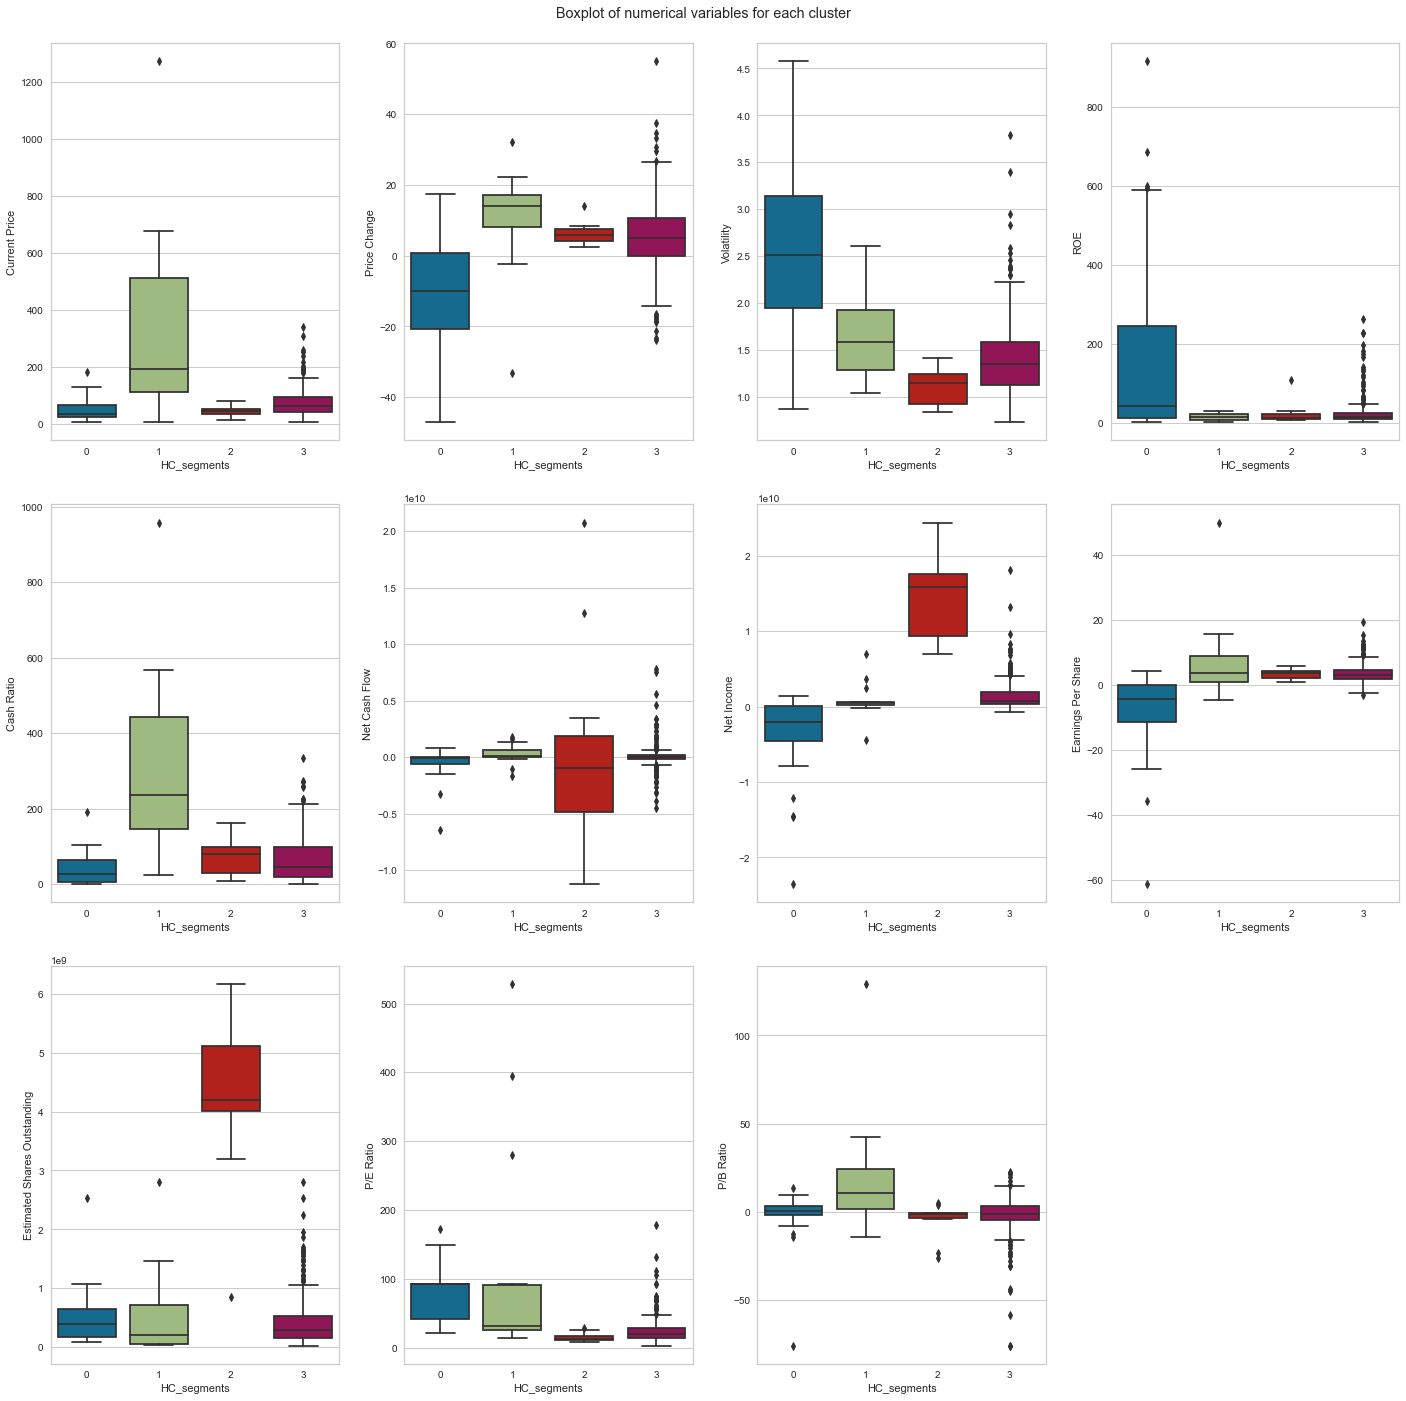

<IPython.core.display.Javascript object>

In [59]:
%%time
# creating boxplot for visualizing the data

plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")
for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)
plt.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - There are 29 shares in this cluster, which is **moderate** amongst the clusters.
    - Volatility are the **highes**t amongst the clusters.
    - ROE are the **highest** amongst the clusters. 
    - Price Change are the **lowest** amongst the clusters.
    - Cash Ratio are the **lowest** amongst the clusters.	
    - Net Cash Flow	are the **lowest** amongst the clusters.
    - Net Income are the **lowest** amongst the clusters.
    - Earnings Per Share are the **lowest** amongst the clusters.
    - *Other indicators* are **moderate**.
    

- **Cluster 1**:
    - There are 15 shares in this cluster, which is **moderate** amongst the clusters.
    - Current Price	are the **highest** amongst the clusters. 
    - Price Change are the **highest** amongst the clusters. 	
    - Cash Ratio are the **highest** amongst the clusters. 	
    - Earnings Per Share are the **highest** amongst the clusters.
    - P/E Ratio	are the **highest** amongst the clusters.
    - P/B Ratio	are the **highest** amongst the clusters. 
    - ROE are the **lowest** amongst the clusters.
    - *Other indicators* are **moderate**.
    
    
- **Cluster 2**:   
    - There are 11 shares in this cluster, which is the **lowest** amongst the clusters.
    - Net Cash Flow	are the **highest** amongst the clusters. 
    - Net Income are the **highest** amongst the clusters. 	
    - Estimated Shares Outstanding are the **highest** amongst the clusters.  
    - Current Price	are the **lowest** amongst the clusters.
    - Volatility are the **lowest** amongst the clusters.
    - P/E Ratio	are the **lowest** amongst the clusters.
    - P/B Ratio	are the **lowest** amongst the clusters.
    - *Other indicators* are **moderate**.    
    

- **Cluster 3**:
    - There are 285 shares in this cluster, which is the **highest** amongst the clusters.
    - The Estimated Shares Outstanding are the **lowest** amongst the clusters.
    - *Other indicators* are **moderate**.
 


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
    
    We have inserted *%%time* at the part "final model" for both techniques to validate the execution time, however for both techniques there is no significant difference in time.


- Which clustering technique gave you more distinct clusters, or are they the same?
    
    Well, we choose to use 4 clusters for both clustering techniques. Therefor the outcomes are quite similar.
    
    
- How many observations are there in the similar clusters of both algorithms?

    Although there are differences there are some similarities.
    - KM cluster 0 and HC cluster 3 are quite similar
    - KM cluster 3 and HC cluster 1 are quite similar


- How many clusters are obtained as the appropriate number of clusters from both algorithms?

    As commented before, we have used 4 clusters for both clusterting techniques. 
    
    
* **Summary**, noticing the answers above, there is no great difference in performance and outcomes in K-means Clustering and Hierachical Clustering. However there will always be minor differences in both techniques.

## Actionable Insights and Recommendations

- **Cluster 3 on KM cluster and Cluster 1 on HC cluster** are the quite similar. These clusters show positive outcomes on average on the indicators:
    - Current Price
    - Price Change
    - Cash Ratio
    - Net Cash Flow (only on K-Means)
    - Earnings Per Share
    - P/E Ratio (only on Hierarchical)
    - P/B Ratio

- If we look at the objective it is recommended to focus on the companies represented in both clusters. Please find the companies to focus on. Important note: Netflix Inc. is part of HC Cluster 1 and **not** part of KM Cluster 3: 
    - Alexion Pharmaceuticals, 
Alliance Data Systems, 
Amazon.com Inc, 
Amgen Inc, 
Analog Devices, Inc., 
Bank of America Corp, 
BIOGEN IDEC Inc., 
Celgene Corp., 
Chipotle Mexican Grill, 
Edwards Lifesciences, 
Equinix, 
Facebook, 
First Solar Inc, 
Frontier Communications, 
Halliburton Co., 
Intuitive Surgical Inc., 
McDonald's Corp., 
Monster Beverage, 
Netflix Inc., 
Priceline.com Inc, 
Regeneron, 
TripAdvisor, 
Vertex Pharmaceuticals Inc, 
Waters Corporation, 
Wynn Resorts Ltd, 
Yahoo Inc.

- KM cluster 0 and HC cluster 3 are the most moderate clusters. These clusters have an okay risk and yield average returns, Estimated Shares Outstanding is the only indicator which is the lowest. 